# Categorical Data

In [66]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import category_encoders as ce

%matplotlib inline

# Identifying Categorical Data: Nominal, Ordinal and Continuous

In [2]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

In [3]:
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [4]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


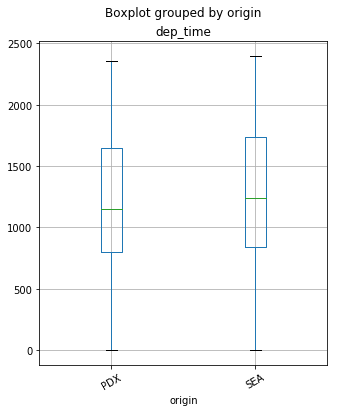

In [5]:
df_flights.boxplot('dep_time', 'origin',rot = 30, figsize=(5,6))

In [6]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

In [7]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [8]:
cat_df_flights.isnull().values.sum()

248

In [9]:
cat_df_flights.isnull().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

In [10]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

In [11]:
cat_df_flights.isnull().values.sum()

0

In [12]:
carrier_count = cat_df_flights['carrier'].value_counts()

In [13]:
carrier_count

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

In [14]:
carrier_count.count()

11

In [15]:
carrier_count.index

Index(['AS', 'WN', 'OO', 'DL', 'UA', 'AA', 'US', 'B6', 'VX', 'F9', 'HA'], dtype='object')

In [16]:
carrier_count.values

array([62460, 23355, 18710, 16716, 16671,  7586,  5946,  3540,  3272,
        2698,  1095], dtype=int64)

In [17]:
sns.set_style('darkgrid')

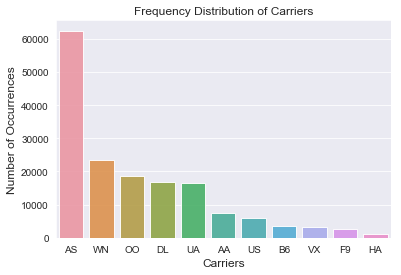

In [18]:
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.xlabel('Carriers', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

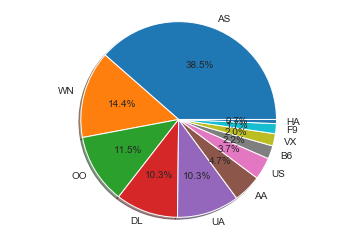

In [19]:
plt.pie(carrier_count.values,
        labels=carrier_count.index,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

# Encoding Categorical Data

## Replacing values

In [20]:
replace_map_comp = {'carrier' :{val:idx 
                                for idx, val in enumerate(cat_df_flights['carrier']
                                                          .astype('category')
                                                          .cat.categories.tolist())}}

In [21]:
replace_map_comp

{'carrier': {'AA': 0,
  'AS': 1,
  'B6': 2,
  'DL': 3,
  'F9': 4,
  'HA': 5,
  'OO': 6,
  'UA': 7,
  'US': 8,
  'VX': 9,
  'WN': 10}}

In [22]:
cat_df_flights_replace = cat_df_flights.copy()

In [23]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

In [24]:
cat_df_flights_replace.head()

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [25]:
cat_df_flights_replace['carrier'].dtypes

dtype('int64')

## Encoding labels

In [26]:
cat_df_flights_lc = cat_df_flights.copy()

In [27]:
# typecasting categorical features to a category dtype to make it faster than object dtype
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')

In [28]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

In [29]:
cat_df_flights_lc.head()

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [30]:
cat_df_flights_specific = cat_df_flights.copy()

In [31]:
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

In [32]:
cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


In [33]:
cat_df_flights_sklearn = cat_df_flights.copy()

In [34]:
lb_make = LabelEncoder()

In [35]:
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights_sklearn['carrier'])

In [36]:
cat_df_flights_sklearn.head()

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


## One-Hot encoding

In [49]:
cat_df_flights_onehot = cat_df_flights.copy()

In [50]:
# cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier', 'dest'], prefix=['carrier', 'dest'])
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix=['carrier'])

In [51]:
cat_df_flights_onehot.head()

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


In [54]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

In [53]:
lb = LabelBinarizer()

In [55]:
lb_result = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])

In [61]:
lb_result_df = pd.DataFrame(lb_result, columns=lb.classes_)

In [62]:
lb_result_df.head()

,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [63]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_result_df], axis=1)

In [64]:
result_df.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


## Binary encoding

In [67]:
cat_df_flights_ce = cat_df_flights.copy()

In [69]:
encoder = ce.BinaryEncoder(cols=['carrier'])

In [70]:
df_binary = encoder.fit_transform(cat_df_flights_ce)

In [71]:
df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC


## Backward difference encoding

In [72]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])

In [73]:
df_bd = encoder.fit_transform(cat_df_flights_ce)

In [74]:
df_bd.head()

,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N508AS,PDX,ANC
1,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N195UW,SEA,CLT
2,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N37422,PDX,IAH
3,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N547UW,PDX,CLT
4,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N762AS,SEA,ANC


## Miscellaneous features

In [82]:
dummy_df_age = pd.DataFrame({'age':['0-20', '20-40', '40-60','60-80']})

In [83]:
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df['age'].map(lambda x: x.split('-')))

In [85]:
dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


In [87]:
dummy_df_age = pd.DataFrame({'age':['0-20', '20-40', '40-60','60-80']})

In [88]:
def split_mean(x):
    split_list = x.split('-')
    mean = float(split_list[0]) + float(split_list[1]) / 2
    return mean

In [93]:
dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

In [94]:
dummy_df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,40.0
2,40-60,70.0
3,60-80,100.0
